In [17]:
#Code Written by Diana Lewis
import numpy as np
import os
import cv2
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras import layers, models 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
#Input Images from File to train the model 
# Specify the folder containing the images and CSV file
folder_path = 'Glaucoma_Balanced_Dataset/Preprocessed_images_input_to_bound'

# Load preprocessed images
images = []
for i in range(30):  # Assuming 30 images starting from 000000
    image_filename = f'enhanced_TRAIN{i:06d}.jpg'  # Zero-padded 6-digit number
    image_path = os.path.join(folder_path, image_filename)
    image = cv2.imread(image_path)
    images.append(image)
    
# Load bounding box labels from CSV file
bounding_box_labels = []
image_filenames = []  # List to store image filenames
csv_file = os.path.join(folder_path, 'Glaucoma30_bounding_boxes_06Apr2024.csv')
with open(csv_file, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Skip header row
    for row in csvreader:
        # Extract image filename from column 4 (assuming 0-based indexing)
        image_filename = row[3].strip()  # Remove leading/trailing whitespaces
        image_filenames.append(image_filename)  # Add filename to the list
        # Extract bounding box parameters from the "rect" column
        bbox_params = eval(row[5])  # Assuming "rect" is the 6th column
        # Extract individual bounding box parameters from the list of dictionaries
        bbox_dict = bbox_params[0]  # Assuming there's only one dictionary in the list
        x = int(bbox_dict['x'])
        y = int(bbox_dict['y'])
        width = int(bbox_dict['width'])
        height = int(bbox_dict['height'])

        # Adjust bounding box parameters (trial and error)
        ####x_adjusted = x * 21  # Adjust x-coordinate by adding 10 pixels
        ####y_adjusted = y * 10 # Adjust y-coordinate by adding 10 pixels
        ####width_adjusted = width * 21  # Adjust width by scaling by a factor of 1.1
        ####height_adjusted = height * 10  # Adjust height by scaling by a factor of 1.1
        # Add bounding box parameters to the list
        #bounding_box_labels.append([x, y, width, height])
        
        
        
        #Matt found the real way to deal the image image size mismatch
        #label studio just gives the percentages of the overall image size for the bounding box
        #Here's the non trial and error method:
        
        x_adjusted = int(x / 100.0 * width)
        y_adjusted = int(y / 100.0 * height)
        width_adjusted = int(width / 100.0 * width)
        height_adjusted = int(height / 100.0 * height)
        
        
        
        
        
        
        bounding_box_labels.append([x_adjusted, y_adjusted, width_adjusted, height_adjusted])

        # Process bounding box parameters as needed
        # Example: Print adjusted bounding box parameters
        print(f"Image: {image_filename}, Adjusted Bounding Box: x={x_adjusted}, y={y_adjusted}, "
                  f"width={width_adjusted}, height={height_adjusted}")

# Convert bounding box labels to numpy array
labels = np.array(bounding_box_labels)

# Print lengths of images and bounding_box_labels lists
print("Number of images:", len(images))
print("Number of bounding box labels:", len(bounding_box_labels))

# Print contents of bounding_box_labels list
#for idx, label in enumerate(bounding_box_labels):
    #print(f"Label {idx + 1}:", label)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print("Number of images in X_train:", len(X_train))
print("Number of labels in y_train:", len(y_train))

# Print a few samples from X_train and y_train
for i in range(min(30, len(X_train))):
    print("Image shape:", X_train[i].shape)
    print("Label:", y_train[i])

#DEBUGGING
#print("Image filenames:", image_filenames)
#print("Image filename from CSV:", image_filename)

# Convert lists to numpy arrays
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
X_val_np = np.array(X_val)
y_val_np = np.array(y_val)

print("Shape of X_train:", X_train_np.shape)
print("Shape of y_train:", y_train_np.shape)

# Check shapes
#print("Shape of X_train:", X_train.shape)
#print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val_np.shape)
print("Shape of y_val:", y_val_np.shape)

# Inspect a few samples
print("Sample image from X_train:", X_train[0].shape)
print("Sample bounding box from y_train:", y_train[0])
print("Sample image from X_val:", X_val[0].shape)
print("Sample bounding box from y_val:", y_val[0])


Image: enhanced_TRAIN000000.jpg, Adjusted Bounding Box: x=1, y=8, width=2, height=12
Image: enhanced_TRAIN000001.jpg, Adjusted Bounding Box: x=11, y=6, width=2, height=10
Image: enhanced_TRAIN000002.jpg, Adjusted Bounding Box: x=2, y=9, width=1, height=5
Image: enhanced_TRAIN000003.jpg, Adjusted Bounding Box: x=3, y=8, width=2, height=12
Image: enhanced_TRAIN000004.jpg, Adjusted Bounding Box: x=6, y=8, width=1, height=6
Image: enhanced_TRAIN000005.jpg, Adjusted Bounding Box: x=7, y=10, width=1, height=7
Image: enhanced_TRAIN000006.jpg, Adjusted Bounding Box: x=13, y=6, width=4, height=19
Image: enhanced_TRAIN000007.jpg, Adjusted Bounding Box: x=11, y=6, width=2, height=12
Image: enhanced_TRAIN000008.jpg, Adjusted Bounding Box: x=6, y=8, width=1, height=4
Image: enhanced_TRAIN000009.jpg, Adjusted Bounding Box: x=1, y=9, width=2, height=10
Image: enhanced_TRAIN000010.jpg, Adjusted Bounding Box: x=2, y=7, width=1, height=4
Image: enhanced_TRAIN000011.jpg, Adjusted Bounding Box: x=6, y=9, 

In [29]:
# Load bounding box labels from CSV file
csv_file = os.path.join(folder_path, 'Glaucoma30_bounding_boxes_06Apr2024.csv')
with open(csv_file, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Skip header row
    for row in csvreader:
        # Extract image filename from the 4th column
        image_filename = row[3]  # Assuming image filename is in the 4th column
        print("Image filename from CSV:", image_filename)
        
        # Find the index of the image filename in the list of image filenames
        image_index = [i for i, filename in enumerate(image_filenames) if filename == image_filename]
        print("Index of image filename:", image_index)
        
        # Print the bounding box label corresponding to the image
        bounding_box_label = bounding_box_labels[image_index[0]]
        print("Bounding box label:", bounding_box_label)

Image filename from CSV: enhanced_TRAIN000000.jpg
Index of image filename: [0]
Bounding box label: [1, 8, 2, 12]
Image filename from CSV: enhanced_TRAIN000001.jpg
Index of image filename: [1]
Bounding box label: [11, 6, 2, 10]
Image filename from CSV: enhanced_TRAIN000002.jpg
Index of image filename: [2]
Bounding box label: [2, 9, 1, 5]
Image filename from CSV: enhanced_TRAIN000003.jpg
Index of image filename: [3]
Bounding box label: [3, 8, 2, 12]
Image filename from CSV: enhanced_TRAIN000004.jpg
Index of image filename: [4]
Bounding box label: [6, 8, 1, 6]
Image filename from CSV: enhanced_TRAIN000005.jpg
Index of image filename: [5]
Bounding box label: [7, 10, 1, 7]
Image filename from CSV: enhanced_TRAIN000006.jpg
Index of image filename: [6]
Bounding box label: [13, 6, 4, 19]
Image filename from CSV: enhanced_TRAIN000007.jpg
Index of image filename: [7]
Bounding box label: [11, 6, 2, 12]
Image filename from CSV: enhanced_TRAIN000008.jpg
Index of image filename: [8]
Bounding box lab

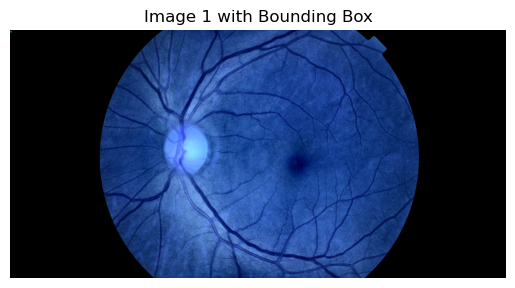

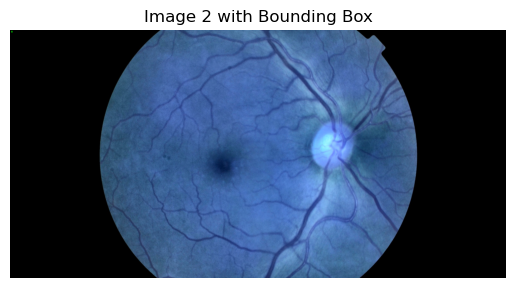

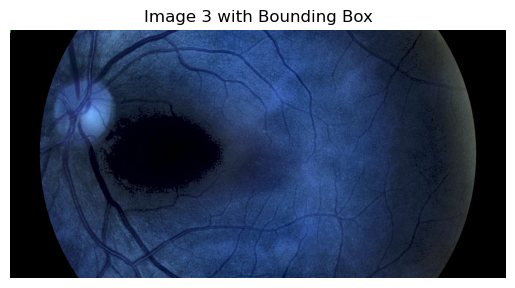

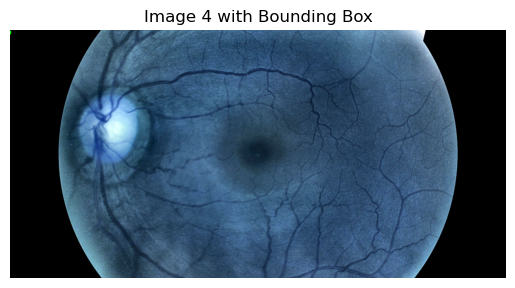

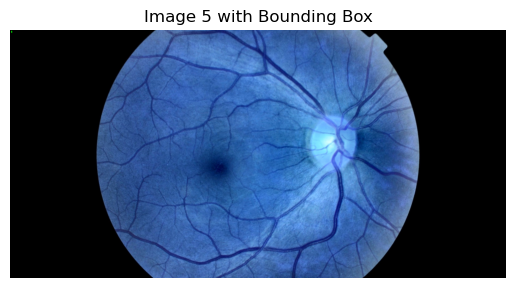

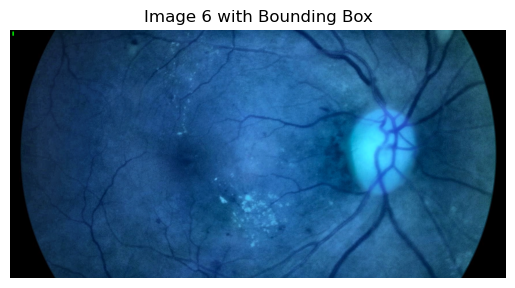

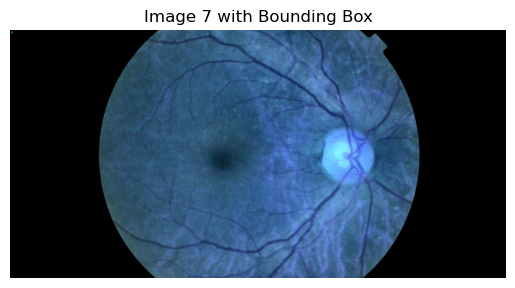

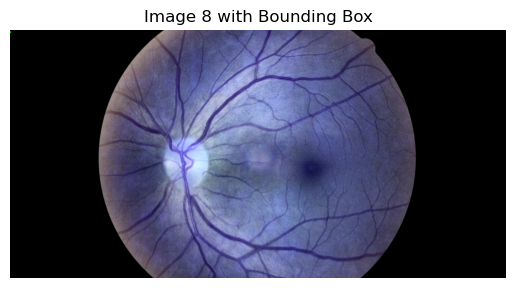

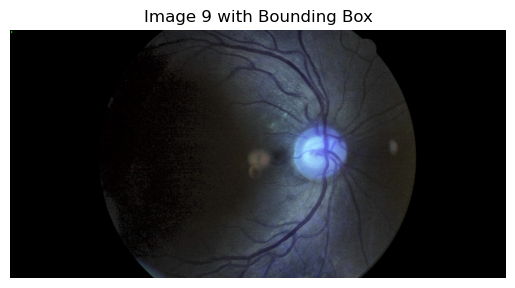

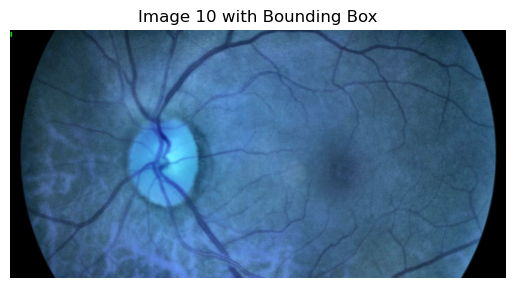

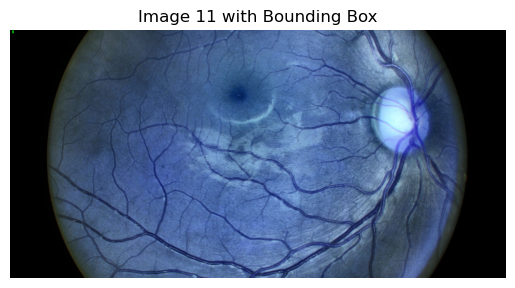

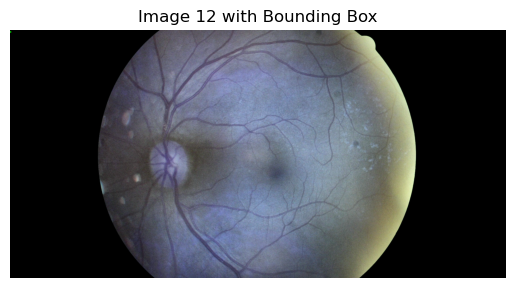

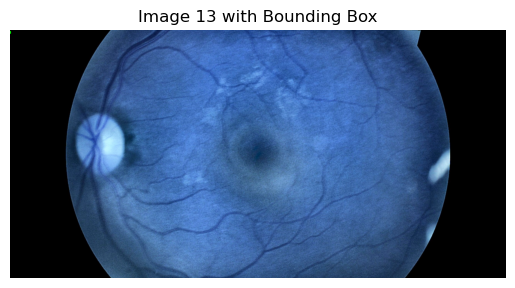

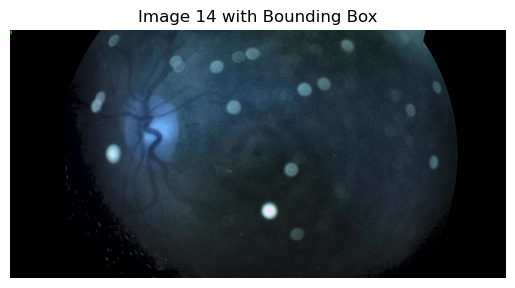

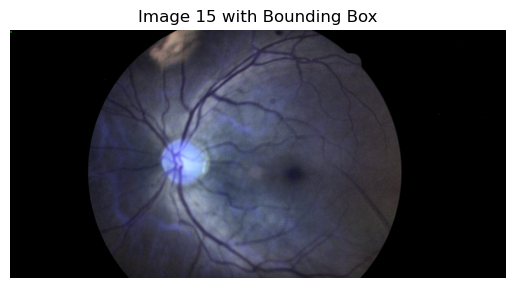

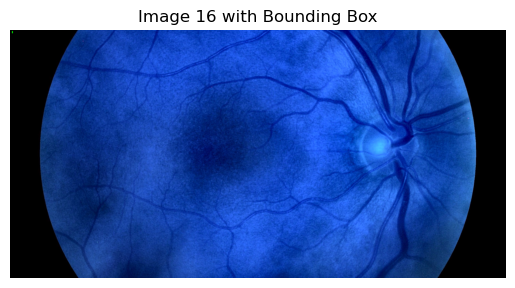

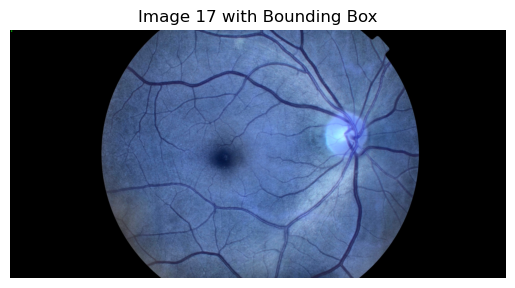

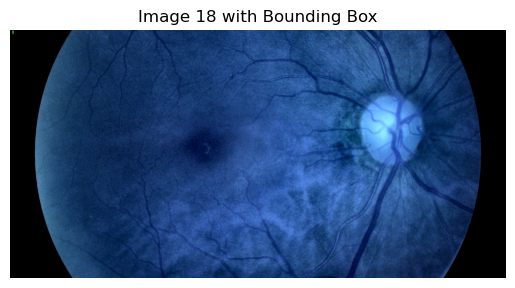

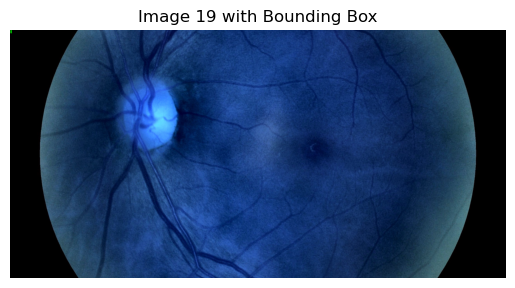

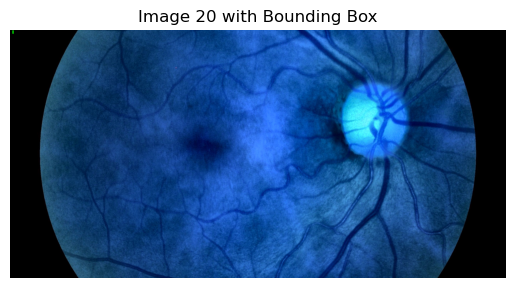

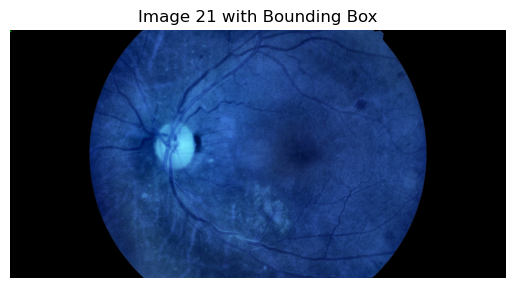

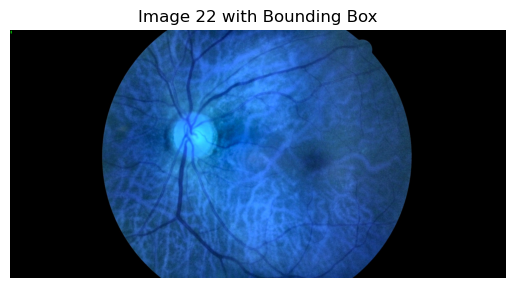

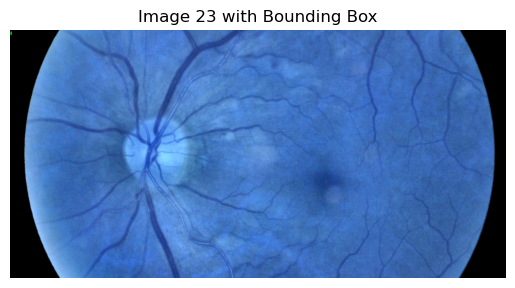

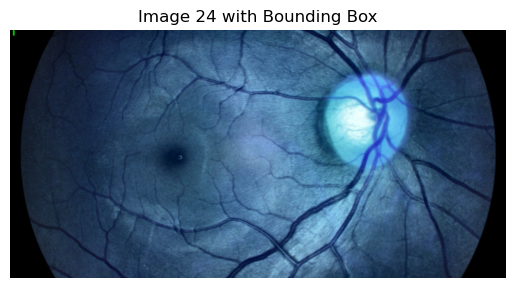

In [30]:
# Function to draw bounding boxes on images
def draw_bounding_box(image, bbox):
    x_adjusted, y_adjusted, width_adjusted, height_adjusted = bbox
    # Draw bounding box rectangle on image
    #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(image, (x_adjusted, y_adjusted), (x_adjusted + width_adjusted, y_adjusted + height_adjusted), (0, 255, 0), 2)
    return image

# Visualize images with bounding boxes
for i in range(len(X_train)):
    image = X_train[i].copy()  # Make a copy of the image to avoid modifying the original
    bbox = y_train[i]  # Get the bounding box for the current image
    # Draw bounding box on image
    image_with_bbox = draw_bounding_box(image, bbox)
    # Display image with bounding box
    plt.imshow(image_with_bbox)
    plt.title(f"Image {i+1} with Bounding Box")
    plt.axis('off')
    plt.show()
    
    
## Matt: FYI these images are showing as blueish instead of redish since you have to display it as BRG instead of RGB.
## Look at some of my other code if you're interested in seeing how you display it correctly
## Leaving it as blue has no impact on the later steps, it's just a matter of how it displays


##use half the width to make a radius and make a circular mask

In [31]:
def create_binary_mask(image_shape, bbox):
    mask = np.zeros(image_shape, dtype=np.uint8)
    x, y, width, height = bbox
    mask[y:y+height, x:x+width] = 1
    return mask

def convert_bboxes_to_masks(images, bboxes):
    masks = []
    for image, bbox in zip(images, bboxes):
        mask = create_binary_mask(image.shape[:2], bbox)
        masks.append(mask)
    return masks

# Example usage:
# Assuming X_train contains input images and y_train contains bounding box labels
masks_train = convert_bboxes_to_masks(X_train, y_train)
masks_val = convert_bboxes_to_masks(X_val, y_val)

In [32]:
#Using U-Net Architecture to construct FCN for Segmentation of Optic Disk and Optic Cup 
#Performed on 30 pre-processed images which have bouding boxes around the area of interest and are cropped to uniform size 
#Use these 30 images to train the FCN to continue this segmentation with remaining images 

def unet (input_shape): 
    inputs = tf.keras.Input (shape = input_shape)

    #Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bottleneck
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)

    # Decoder
    up5 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv4)
    up5 = layers.concatenate([up5, conv3], axis=3)
    conv5 = layers.Conv2D(256, 3, activation='relu', padding='same')(up5)
    conv5 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv5)

    up6 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv5)
    up6 = layers.concatenate([up6, conv2], axis=3)
    conv6 = layers.Conv2D(128, 3, activation='relu', padding='same')(up6)
    conv6 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv6)

    up7 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv6)
    up7 = layers.concatenate([up7, conv1], axis=3)
    conv7 = layers.Conv2D(64, 3, activation='relu', padding='same')(up7)
    conv7 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv7)

    # Output
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(conv7)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Set input shape and create model
input_shape = (1024, 2048 , 3)  # Adjust according to your input image size
model = unet(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
#model.summary()
# Train the model
history = model.fit(X_train, y_train, batch_size=8, epochs=50, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)

# Optionally, save the trained model
# Example: model.save('fcn_model.h5')
    

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024
'y' sizes: 24
